In [1]:
import numpy as np
import pandas as pd

from scipy.interpolate import interp1d
from scipy.signal import argrelmin

from sklearn.preprocessing import normalize
import matplotlib.pyplot as plt

import os
import pickle

# Load Positions

In [2]:
run_folder = "track_data/Straight_Line/run-1"
positions = pickle.load(open(os.path.join(run_folder, "positions.pkl"), "rb"))
finish_time = positions[-1]["time"]/1000

raw_points = [list(pos['position'].to_numpy()) for pos in positions]
df = pd.DataFrame(raw_points)
ema = df.ewm(com=40).mean()
raw_points = ema.values.tolist()
    
# remove duplicates:
points = [raw_points[0]]
for point in raw_points[1:]:
    if point != points[-1]:
        points.append(point)
    else:
        for i in range(len(point)):
            point[i] += 0.01
        points.append(point)
points = np.array(points)
print("finish_time: ", finish_time)
print(points)

finish_time:  20.32
[[820.79998779  10.21000004 592.        ]
 [820.80998779  10.22000004 592.01      ]
 [820.79998779  10.20897516 592.        ]
 ...
 [290.19837068   9.35898927 591.99957275]
 [289.91828541   9.35899361 591.99957275]
 [289.63812855   9.35899712 591.99957275]]


# Parametric Curve

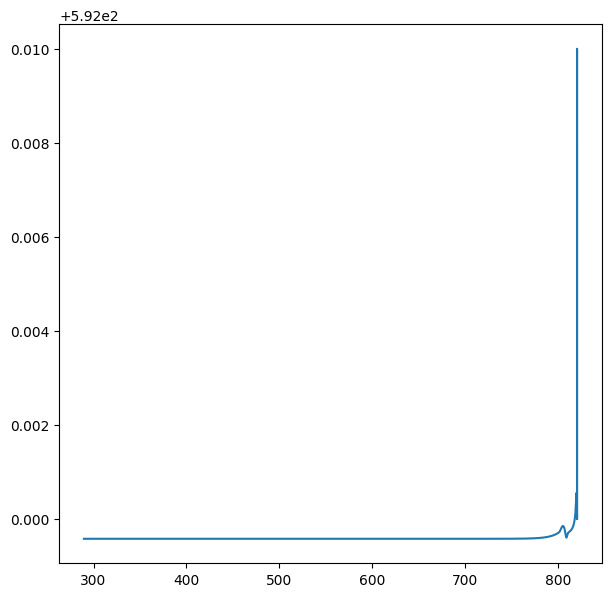

In [3]:
# Time along the track:
time = np.linspace(0, 1, len(points))

# Interpolation for different methods:
interpolations_methods = ['slinear']
alpha = np.linspace(0, 1, len(points)*100)

interpolated_points = {}
for method in interpolations_methods:
    interpolator =  interp1d(time, points, kind=method, axis=0)
    interpolated_points[method] = interpolator(alpha)

# Graph:
plt.figure(figsize=(7,7))
for method_name, curve in interpolated_points.items():
    plt.plot(*curve[:, [0, 2]].T, '-', label=method_name);

In [21]:
time_interpolator = interp1d(time, points, kind='slinear', axis=0)

distance = np.cumsum(np.sqrt(np.sum( np.diff(points, axis=0)**2, axis=1)))
distance = np.insert(distance, 0, 0)/distance[-1]
percentage_interpolator = interp1d(distance, points, kind='slinear', axis=0)

# Closest Point

In [22]:
def distance_3D(x, y, z, x0, y0, z0):
    d_x = x - x0
    d_y = y - y0
    d_z = z - z0
    dis = np.sqrt( d_x**2 + d_y**2 + d_z**2)
    return dis

## Time progress

In [53]:
alpha = np.linspace(0, 1, len(points)*100)
coords = time_interpolator(alpha)
x = coords[:,0]
y = coords[:,1]
z = coords[:,2]
coords

array([[820.79998779,  10.21000004, 592.        ],
       [820.80008774,  10.21009999, 592.00009995],
       [820.8001877 ,  10.21019994, 592.0001999 ],
       ...,
       [289.64372896,   9.35899705, 591.99957275],
       [289.64092875,   9.35899708, 591.99957275],
       [289.63812855,   9.35899712, 591.99957275]])

In [65]:
# The point P
P = [559.09837068,   9.35898927,  591.99957275]

# compute distance
dis = distance_3D(x, y, z, P[0], P[1], P[2])
# find the minima
glob_min_idx = np.argmin(dis)
# distance
min_d = dis[glob_min_idx]

associated_time = alpha[glob_min_idx]*finish_time
print(associated_time)
print(glob_min_idx)

10.647712384222253
106529


In [67]:
10.64/finish_time

0.5236220472440946

## Percentage Progress

In [68]:
alpha = np.linspace(0, 1, len(points)*100)
coords = percentage_interpolator(alpha)
x = coords[:,0]
y = coords[:,1]
z = coords[:,2]
coords

array([[820.79998779,  10.21000004, 592.        ],
       [820.8014966 ,  10.21150885, 592.00150881],
       [820.80300542,  10.21301766, 592.00301762],
       ...,
       [289.64335523,   9.35899705, 591.99957275],
       [289.64074189,   9.35899708, 591.99957275],
       [289.63812855,   9.35899712, 591.99957275]])

In [69]:
# The point P
P = [559.09837068,   9.35898927,  591.99957275]

# compute distance
dis = distance_3D(x, y, z, P[0], P[1], P[2])
# find the minima
glob_min_idx = np.argmin(dis)
# distance
min_d = dis[glob_min_idx]

associated_progress = glob_min_idx/len(alpha)

print(associated_progress)
print(glob_min_idx)

0.4928135759960649
100189


In [35]:
alpha[glob_min_idx]

0.00034432043443401097